In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,f1_score,precision_score,recall_score,confusion_matrix

In [9]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.shape

(891, 12)

In [11]:
df.Age = df.Age.fillna(df.Age.mean())
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])
df = df.drop(['Cabin'],axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\ACER\AppData\Local\Temp\ipykernel_40776\1470924933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde = True , bins = 25)


np.float64(0.9662793026645233)

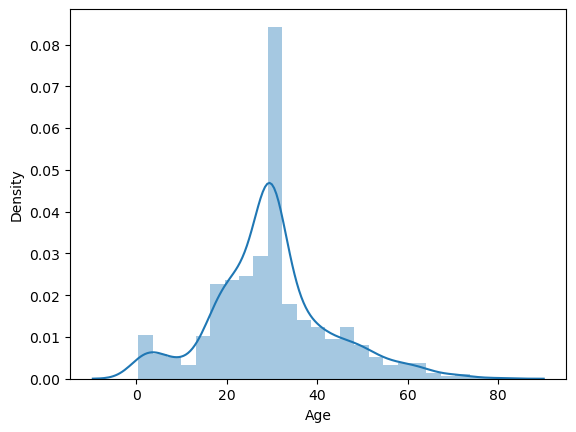

In [ ]:
sns.distplot(df['Age'],kde = True , bins = 25)


In [23]:
print(df.Age.skew(),
df.Age.kurt())

0.4344880940129925 0.9662793026645233


<Axes: xlabel='Age'>

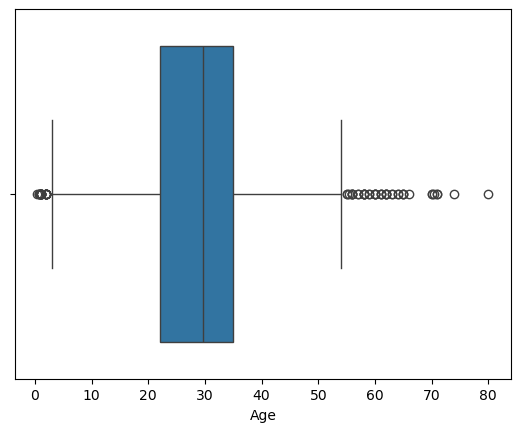

In [39]:
sns.boxplot(x = df['Age'])

In [43]:
df[(df['Age']>=75)].value_counts().shape[0]

1

C:\Users\ACER\AppData\Local\Temp\ipykernel_40776\4238333344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 0].Age,kde = True , bins = 25)
C:\Users\ACER\AppData\Local\Temp\ipykernel_40776\4238333344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 1

<Axes: xlabel='Age', ylabel='Density'>

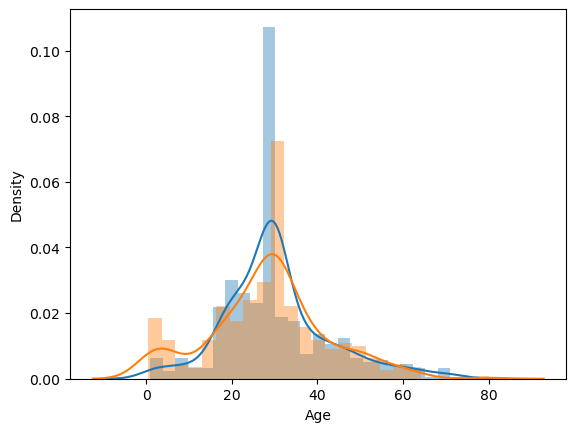

In [26]:
sns.distplot(df[df['Survived']== 0].Age,kde = True , bins = 25)
sns.distplot(df[df['Survived']== 1].Age,kde = True , bins = 25)

*Conclusion

1.The value of skew and kurt shows a stable age distribution

2.The values of young people died more than children and adults

3.The outliers may be small


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Eda on Fare

C:\Users\ACER\AppData\Local\Temp\ipykernel_40776\3269648805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],kde = True ,bins = 25)


<Axes: xlabel='Fare', ylabel='Density'>

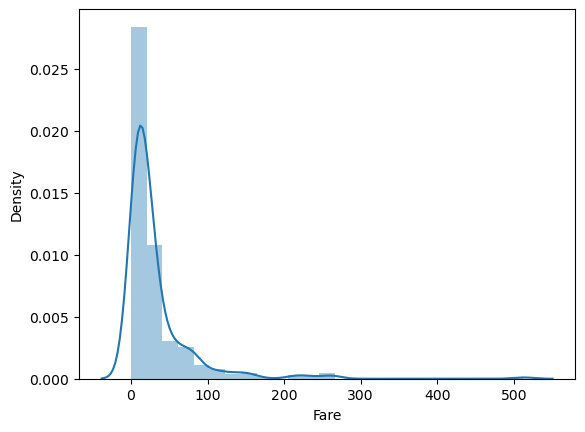

In [28]:
sns.distplot(df['Fare'],kde = True ,bins = 25)

<Axes: xlabel='Fare'>

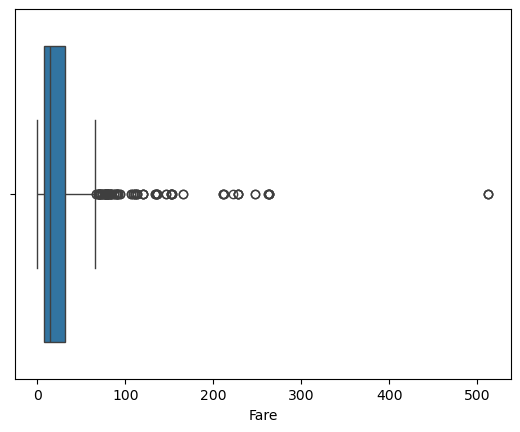

In [30]:
sns.boxplot(x = df['Fare'])

In [50]:
df[df["Fare"] > 500].value_counts().shape[0]


3

In [36]:
print(df.Fare.skew(),
df.Fare.kurt())

4.787316519674893 33.39814088089868


C:\Users\ACER\AppData\Local\Temp\ipykernel_40776\2487053228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 0].Fare)
C:\Users\ACER\AppData\Local\Temp\ipykernel_40776\2487053228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 1].Fare)


<Axes: xlabel='Fare', ylabel='Density'>

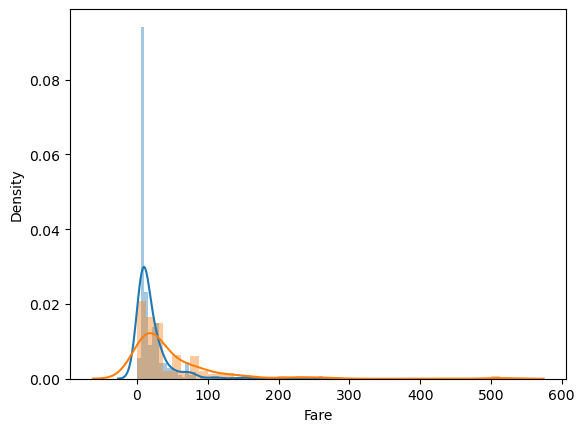

In [53]:
sns.distplot(df[df['Survived']== 0].Fare)
sns.distplot(df[df['Survived']== 1].Fare)

In [ ]:
df = df.astype(
    {
        'Sex':'Categorical',
        'Embarked':'Categorical',
        'Pclass':'Categorical',
        'Age' : 'int',
        'Fare' : 'Float',
    }
)

TypeError: data type 'Categorical' not understood